In [501]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [502]:
file_path = '../datasets/cleanedfix.csv'
df = pd.read_csv(file_path)

In [503]:
df['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8328
1    1992
3    1565
4     362
6      42
7       7
Name: count, dtype: int64

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12296 non-null  object
 1   Age_band_of_driver           12296 non-null  object
 2   Sex_of_driver                12296 non-null  object
 3   Vehicle_driver_relation      12296 non-null  object
 4   Driving_experience           12296 non-null  object
 5   Type_of_vehicle              12296 non-null  object
 6   Owner_of_vehicle             12296 non-null  object
 7   Area_accident_occured        12296 non-null  object
 8   Lanes_or_Medians             12296 non-null  object
 9   Road_allignment              12296 non-null  object
 10  Types_of_Junction            12296 non-null  object
 11  Road_surface_type            12296 non-null  object
 12  Road_surface_conditions      12296 non-null  object
 13  Light_conditions             12

In [505]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                  4058
Office areas           3451
Residential areas      2060
Church areas           1060
Industrial areas        456
School areas            415
Recreational areas      328
Outside rural areas     218
Hospital areas          121
Market areas             63
Rural village areas      44
Unknown                  22
Name: count, dtype: int64

# Label Encoding

In [506]:
df_label = df.copy()

le = LabelEncoder()
df_label["Accident_severity"] = le.fit_transform(df_label["Accident_severity"])

ordinal_features = df_label.select_dtypes(include=['object']).columns
oe = OrdinalEncoder()
df_label[ordinal_features] = oe.fit_transform(df_label[ordinal_features]).astype(int)

# df_label[ordinal_features]
df_label

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,17,0,1,0,0,3,3,8,2,5,...,2,2,4,2,2,2,3,3,2,1
1,17,1,1,0,3,4,3,4,4,5,...,2,2,7,2,2,2,3,9,2,1
2,17,0,1,0,0,0,3,7,6,5,...,2,2,4,2,2,2,2,11,1,1
3,1,0,1,0,2,4,0,4,6,6,...,0,2,7,2,2,2,2,11,2,3
4,1,0,1,0,1,3,3,2,6,5,...,0,2,7,2,2,2,3,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,16,1,1,0,1,0,3,6,4,5,...,2,2,7,2,1,2,3,4,2,6
12292,18,4,1,0,2,3,3,6,2,0,...,2,2,7,2,1,3,3,4,2,3
12293,13,2,1,0,2,4,3,6,2,7,...,2,2,7,1,1,3,2,11,1,3
12294,13,0,0,0,3,0,3,4,4,7,...,0,2,7,2,1,3,3,0,2,3


In [507]:
# df_label = df.copy()

# label_encoders = {}
# for col in df_label.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df_label[col] = le.fit_transform(df_label[col])
#     label_encoders[col] = le

# df_label


In [508]:
X = df_label.drop(columns=['Accident_severity'])
y = df_label['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
label_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
label_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
label_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
label_xgb_cv = xgb_cv_scores.mean()

label_rf_accuracy, label_xgb_acccuracy, label_rv_cv, label_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {label_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {label_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {label_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {label_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8483431591786949
Akurasi model XGBoost pada data uji : 0.847326692417158
Akurasi model Random Forest pada CV : 0.8482428245998606
Akurasi model XGBoost pada CV : 0.841085079862592


# One-Hot Encoding

In [509]:
df_ohe = df.copy()

label_enc = LabelEncoder()
df_ohe["Accident_severity"] = label_enc.fit_transform(df_ohe["Accident_severity"])

exclude_cols = ['Accident_severity'] 
one_hot_features = df_ohe.select_dtypes(include=['object', 'category']).columns.difference(exclude_cols)

df_ohe = pd.get_dummies(df_ohe, columns=one_hot_features, dtype=int)

print(df_ohe.head())

   Number_of_vehicles_involved  Number_of_casualties  Accident_severity  \
0                            2                     2                  2   
1                            2                     2                  2   
2                            2                     2                  1   
3                            2                     2                  2   
4                            2                     2                  2   

   Age_band_of_driver_18-30  Age_band_of_driver_31-50  \
0                         1                         0   
1                         0                         1   
2                         1                         0   
3                         1                         0   
4                         1                         0   

   Age_band_of_driver_Over 51  Age_band_of_driver_Under 18  \
0                           0                            0   
1                           0                            0   
2                   

In [510]:
X = df_ohe.drop(columns=['Accident_severity'])
y = df_ohe['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
ohe_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
ohe_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
ohe_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
ohe_xgb_cv = xgb_cv_scores.mean()

ohe_rf_accuracy, ohe_xgb_acccuracy, ohe_rv_cv, ohe_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {ohe_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {ohe_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {ohe_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {ohe_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8487497458833096
Akurasi model XGBoost pada data uji : 0.8493596259402317
Akurasi model Random Forest pada CV : 0.8479177535980321
Akurasi model XGBoost pada CV : 0.8409226104867799


# Target Encoding

Encoding target class menggunakan label encoding

In [511]:
df_target = df.copy()

target_column = 'Accident_severity'

le = LabelEncoder()
df_target[target_column] = le.fit_transform(df_target[target_column])

categorical_features = df_target.select_dtypes(include=['object']).columns.tolist()

te = TargetEncoder()
df_target[categorical_features] = te.fit_transform(df_target[categorical_features], df_target[target_column])

df_target.head()

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,1.857843,1.829972,1.831932,1.834806,1.846154,1.833100,1.831243,1.806796,1.830692,1.833097,...,1.841548,1.826914,1.823177,2,2,1.834306,1.840812,1.811785,2,1.864286
1,1.857843,1.841538,1.831932,1.834806,1.831490,1.830928,1.831243,1.839757,1.829294,1.833097,...,1.841548,1.826914,1.838120,2,2,1.834306,1.840812,1.796687,2,1.864286
2,1.857843,1.829972,1.831932,1.834806,1.846154,1.826220,1.831243,1.829268,1.829268,1.833097,...,1.841548,1.826914,1.823177,2,2,1.834306,1.826444,1.831912,1,1.864286
3,1.813433,1.829972,1.831932,1.834806,1.834768,1.830928,1.843420,1.839757,1.829268,1.838323,...,1.818293,1.826914,1.838120,2,2,1.834306,1.826444,1.831912,2,1.823329
4,1.813433,1.829972,1.831932,1.834806,1.819923,1.833100,1.831243,1.842105,1.829268,1.833097,...,1.818293,1.826914,1.838120,2,2,1.834306,1.840812,1.796687,2,1.823329


In [512]:
X = df_target.drop(columns=['Accident_severity'])
y = df_target['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
target_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
target_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
target_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
target_xgb_cv = xgb_cv_scores.mean()

target_rf_accuracy, target_xgb_acccuracy, target_rv_cv, target_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {target_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {target_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {target_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {target_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8507826794063834
Akurasi model XGBoost pada data uji : 0.8509859727586908
Akurasi model Random Forest pada CV : 0.8483241584754196
Akurasi model XGBoost pada CV : 0.8379134224038459


Encoding semua fitur menggunakan target encoding

# K-Fold Target Encoding

In [513]:
df['Number_of_casualties']

0        2
1        2
2        2
3        2
4        2
        ..
12291    1
12292    1
12293    1
12294    1
12295    1
Name: Number_of_casualties, Length: 12296, dtype: int64

In [514]:
df_k = df.copy()
# Inisialisasi Label Encoder untuk target
label_encoder = LabelEncoder()
df_k['Accident_severity'] = label_encoder.fit_transform(df_k['Accident_severity'])

# Daftar fitur kategorikal (tanpa target)
categorical_features = df_k.select_dtypes(include=['object']).columns.tolist()

# Parameter K-Fold
n_splits = 5  # Bisa disesuaikan sesuai kebutuhan
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Fungsi untuk K-Fold Target Encoding
def kfold_target_encoding(df_k, col, target, kf):
    new_col_name = col + '_encoded'
    df_k[new_col_name] = np.nan  # Inisialisasi kolom baru
    
    for train_idx, val_idx in kf.split(df_k):
        train_fold, val_fold = df_k.iloc[train_idx], df_k.iloc[val_idx]
        means = train_fold.groupby(col)[target].mean()
        df_k.loc[val_idx, new_col_name] = df_k.loc[val_idx, col].map(means)
    
    # Isi NaN dengan rata-rata keseluruhan
    df_k[new_col_name].fillna(df_k[target].mean(), inplace=True)
    return df_k

# Menerapkan encoding ke semua fitur kategorikal
for col in categorical_features:
    df_k = kfold_target_encoding(df_k, col, 'Accident_severity', kf)

# Hapus kolom kategorikal asli
df_k.drop(columns=categorical_features, inplace=True)

df_k


C:\Users\ACER\AppData\Local\Temp\ipykernel_25208\3528357881.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_k[new_col_name].fillna(df_k[target].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_25208\3528357881.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Time_encoded,Age_band_of_driver_encoded,Sex_of_driver_encoded,Vehicle_driver_relation_encoded,Driving_experience_encoded,Type_of_vehicle_encoded,Owner_of_vehicle_encoded,...,Types_of_Junction_encoded,Road_surface_type_encoded,Road_surface_conditions_encoded,Light_conditions_encoded,Weather_conditions_encoded,Type_of_collision_encoded,Vehicle_movement_encoded,Casualty_severity_encoded,Cause_of_accident_encoded,Day_encoded
0,2,2,2,1.858859,1.830742,1.832658,1.834763,1.856330,1.832211,1.832686,...,1.809446,1.834883,1.833177,1.840919,1.828962,1.818667,1.836234,1.840357,1.799342,1.868401
1,2,2,2,1.863450,1.838433,1.828528,1.831345,1.826158,1.828852,1.827748,...,1.807895,1.830316,1.829864,1.838210,1.824391,1.833895,1.829303,1.835586,1.788868,1.857143
2,2,2,1,1.852729,1.828797,1.834373,1.838140,1.844460,1.823250,1.832206,...,1.816392,1.834243,1.831986,1.843411,1.827177,1.822481,1.835802,1.825842,1.831005,1.860759
3,2,2,2,1.837838,1.830742,1.832658,1.834763,1.836674,1.834716,1.842805,...,1.835460,1.821918,1.833177,1.823033,1.828962,1.841928,1.836234,1.827679,1.835800,1.816132
4,2,2,2,1.819820,1.828698,1.828528,1.831345,1.818225,1.830390,1.827748,...,1.826399,1.830316,1.829864,1.815709,1.824391,1.833895,1.829303,1.835586,1.788868,1.817708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,2,1,2,1.843111,1.848354,1.832658,1.834763,1.810979,1.827141,1.832686,...,1.809446,1.834883,1.833177,1.840919,1.828962,1.841928,1.836234,1.840357,1.847183,1.831967
12292,2,1,2,1.828758,1.880264,1.834373,1.838140,1.838187,1.836627,1.832206,...,1.816392,1.834243,1.831986,1.843411,1.827177,1.839635,1.848118,1.846525,1.846659,1.828190
12293,1,1,1,1.841762,1.792393,1.828528,1.831345,1.831522,1.828852,1.827748,...,1.807895,1.830316,1.829864,1.838210,1.824391,1.833895,1.841962,1.824300,1.830560,1.817708
12294,2,1,2,1.833071,1.830742,1.839060,1.834763,1.834165,1.827141,1.832686,...,1.809446,1.834883,1.833177,1.823033,1.828962,1.841928,1.841689,1.840357,1.836177,1.816132


In [515]:
X = df_k.drop(columns=['Accident_severity'])
y = df_k['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
k_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
k_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
k_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
k_xgb_cv = xgb_cv_scores.mean()

k_rf_accuracy, k_xgb_acccuracy, k_rv_cv, k_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {k_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {k_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {k_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {k_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8467168123602358
Akurasi model XGBoost pada data uji : 0.8436674120756251
Akurasi model Random Forest pada CV : 0.8467791454653059
Akurasi model XGBoost pada CV : 0.8385645893465847


# MIX encoding

In [516]:
df_mix = df.copy()

# label enc for target class
label_enc = LabelEncoder()
df_mix["Accident_severity"] = label_enc.fit_transform(df_ohe["Accident_severity"])

# OHE

In [517]:
one_hot_features = [
    "Sex_of_driver", "Vehicle_driver_relation", "Owner_of_vehicle", 
    "Road_surface_type", "Road_surface_conditions", "Light_conditions", "Day"
]

df_mix = pd.get_dummies(df_mix, columns=one_hot_features, dtype=int)

df_mix.head()


,Time,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Weather_conditions,Type_of_collision,...,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Daylight,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,17:00:00,18-30,1-2yr,Private Vehicle,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Normal,Stationary Object Collision,...,0,0,1,0,1,0,0,0,0,0
1,17:00:00,31-50,Above 10yr,Public Transport,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Normal,Vehicle Collision,...,0,0,1,0,1,0,0,0,0,0
2,17:00:00,18-30,1-2yr,Commercial Vehicle,Recreational areas,other,Tangent road with flat terrain,No junction,Normal,Stationary Object Collision,...,0,0,1,0,1,0,0,0,0,0
3,01:00:00,18-30,5-10yr,Public Transport,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Normal,Vehicle Collision,...,1,0,0,0,0,0,1,0,0,0
4,01:00:00,18-30,2-5yr,Private Vehicle,Industrial areas,other,Tangent road with flat terrain,Y Shape,Normal,Vehicle Collision,...,1,0,0,0,0,0,1,0,0,0


# Ordinal

In [518]:
ordinal_encode_features = ["Age_band_of_driver", "Driving_experience", "Casualty_severity"]

oe = OrdinalEncoder()
df_mix[ordinal_encode_features] = oe.fit_transform(df_mix[ordinal_encode_features]).astype(int)

df_mix.head()

,Time,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Weather_conditions,Type_of_collision,...,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Daylight,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,17:00:00,0,0,Private Vehicle,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Normal,Stationary Object Collision,...,0,0,1,0,1,0,0,0,0,0
1,17:00:00,1,3,Public Transport,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Normal,Vehicle Collision,...,0,0,1,0,1,0,0,0,0,0
2,17:00:00,0,0,Commercial Vehicle,Recreational areas,other,Tangent road with flat terrain,No junction,Normal,Stationary Object Collision,...,0,0,1,0,1,0,0,0,0,0
3,01:00:00,0,2,Public Transport,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Normal,Vehicle Collision,...,1,0,0,0,0,0,1,0,0,0
4,01:00:00,0,1,Private Vehicle,Industrial areas,other,Tangent road with flat terrain,Y Shape,Normal,Vehicle Collision,...,1,0,0,0,0,0,1,0,0,0


# K-Fold Target

In [519]:
kfold_target_encode_features = [
    "Time", "Type_of_vehicle", "Area_accident_occured", "Lanes_or_Medians",
    "Road_allignment", "Types_of_Junction", "Weather_conditions",
    "Type_of_collision", "Vehicle_movement", "Cause_of_accident"
]

# Daftar fitur kategorikal (tanpa target)
# kfold_target_encode_features = df_mix.select_dtypes(include=['object']).columns.tolist()

# Parameter K-Fold
n_splits = 5  # Bisa disesuaikan sesuai kebutuhan
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Fungsi untuk K-Fold Target Encoding
def kfold_target_encoding(df_mix, col, target, kf):
    new_col_name = col + '_encoded'
    df_mix[new_col_name] = np.nan  # Inisialisasi kolom baru
    
    for train_idx, val_idx in kf.split(df_mix):
        train_fold, val_fold = df_mix.iloc[train_idx], df_mix.iloc[val_idx]
        means = train_fold.groupby(col)[target].mean()
        df_mix.loc[val_idx, new_col_name] = df_mix.loc[val_idx, col].map(means)
    
    # Isi NaN dengan rata-rata keseluruhan
    df_mix[new_col_name].fillna(df_mix[target].mean(), inplace=True)
    return df_mix

# Menerapkan encoding ke semua fitur kategorikal
for col in kfold_target_encode_features:
    df_mix = kfold_target_encoding(df_mix, col, 'Accident_severity', kf)

# Hapus kolom kategorikal asli
df_mix.drop(columns=kfold_target_encode_features, inplace=True)

df_mix

C:\Users\ACER\AppData\Local\Temp\ipykernel_25208\2064183657.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mix[new_col_name].fillna(df_mix[target].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_25208\2064183657.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,Age_band_of_driver,Driving_experience,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Vehicle_driver_relation_Employee,...,Time_encoded,Type_of_vehicle_encoded,Area_accident_occured_encoded,Lanes_or_Medians_encoded,Road_allignment_encoded,Types_of_Junction_encoded,Weather_conditions_encoded,Type_of_collision_encoded,Vehicle_movement_encoded,Cause_of_accident_encoded
0,0,0,2,2,3,2,0,1,0,1,...,1.858859,1.832211,1.806728,1.828982,1.834159,1.809446,1.828962,1.818667,1.836234,1.799342
1,1,3,2,2,3,2,0,1,0,1,...,1.863450,1.828852,1.835946,1.823960,1.828703,1.807895,1.824391,1.833895,1.829303,1.788868
2,0,0,2,2,2,1,0,1,0,1,...,1.852729,1.823250,1.830827,1.830664,1.834911,1.816392,1.827177,1.822481,1.835802,1.831005
3,0,2,2,2,2,2,0,1,0,1,...,1.837838,1.834716,1.843273,1.830289,1.843829,1.835460,1.828962,1.841928,1.836234,1.835800
4,0,1,2,2,3,2,0,1,0,1,...,1.819820,1.830390,1.827869,1.818807,1.828703,1.826399,1.824391,1.833895,1.829303,1.788868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,1,1,2,1,3,2,0,1,0,1,...,1.843111,1.827141,1.789773,1.835240,1.834159,1.809446,1.828962,1.841928,1.836234,1.847183
12292,4,2,2,1,3,2,0,1,0,1,...,1.828758,1.836627,1.813953,1.829771,1.833333,1.816392,1.827177,1.839635,1.848118,1.846659
12293,2,2,1,1,2,1,0,1,0,1,...,1.841762,1.828852,1.807910,1.829256,1.819048,1.807895,1.824391,1.833895,1.841962,1.830560
12294,0,3,2,1,3,2,1,0,0,1,...,1.833071,1.827141,1.843273,1.835240,1.833876,1.809446,1.828962,1.841928,1.841689,1.836177


# Splitting

In [520]:
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
mix_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
mix_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
mix_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
mix_xgb_cv = xgb_cv_scores.mean()

mix_rf_accuracy, mix_xgb_acccuracy, mix_rv_cv, mix_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {mix_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {mix_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {mix_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {mix_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:50:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:50:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.84793657247408
Akurasi model XGBoost pada data uji : 0.842041065257166
Akurasi model Random Forest pada CV : 0.8460473720231306
Akurasi model XGBoost pada CV : 0.8395401660401314


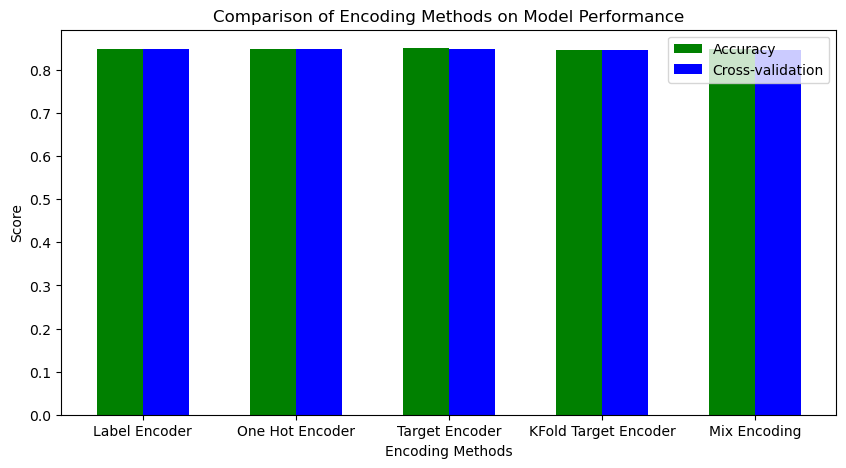

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encoding_methods = ['Label Encoder', 'One Hot Encoder', 'Target Encoder', 'KFold Target Encoder', 'Mix Encoding']
accuracy_scores = [label_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, k_rf_accuracy, mix_rf_accuracy]
cv_scores = [label_rv_cv, ohe_rv_cv, target_rv_cv, k_rv_cv, mix_rv_cv]

x = np.arange(len(encoding_methods))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='green')
ax.bar(x + width/2, cv_scores, width, label='Cross-validation', color='blue')

ax.set_xlabel('Encoding Methods')
ax.set_ylabel('Score')
ax.set_title('Comparison of Encoding Methods on Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(encoding_methods, rotation=0)
ax.legend()

plt.show()